In [ ]:
# Links
# Hard one https://stackoverflow.com/questions/8780912/how-can-i-perform-a-least-squares-fitting-over-multiple-data-sets-fast?rq=1
# 

In [2]:
import pylab as pp
import numpy as np
from scipy import integrate, interpolate
from scipy import optimize

In [5]:
y_data

array([0.   , 0.416, 0.489, 0.595, 0.506, 0.493, 0.458, 0.394, 0.335,
       0.309])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
x, data = generate_data(256, 6)

NameError: name 'generate_data' is not defined

In [14]:
def generate_data(numpoints, numcurves, noise=None):
    np.random.seed(3)
    x = np.linspace(0, 500, numpoints)

    height = 7000 * np.random.random(numcurves)
    mu = 1100 * np.random.random(numcurves) 
    sigma = 100 * np.random.random(numcurves) + 0.1
    data = gaussian(x, sigma, mu, height)

    if noise is None:
        noise = 0.1 * height.max()
    noise = noise * (np.random.random(data.shape) - 0.5)
    return x, data + noise
def gaussian(x, sigma, mu, height):
    data = -np.subtract.outer(x, mu)**2 / (2 * sigma**2)
    return height * np.exp(data)


In [15]:
x, data = generate_data(256, 6)

In [19]:
data

array([[ 252.32212665,  -53.26594726, 1300.03585979,  121.17572698,
         -37.35964493, -215.28295222],
       [ 457.88110049,  175.87093031, 1348.92267961, -174.44505894,
         -70.28741133,  273.78935465],
       [ 756.33418045,  108.15440816, 1757.27933281,  216.9258815 ,
         -76.5471683 , -255.84515371],
       ...,
       [  46.90425555,  117.34247112,  -40.67079437, 3360.48067864,
          13.55049108, 6420.59390718],
       [ -56.17423982,  117.99201219, -155.1879727 , 3419.54021233,
         277.1578673 , 5982.58227405],
       [ 259.94299161, -280.85172509,  195.49650005, 3384.13733348,
         126.22498916, 6098.90973898]])

In [3]:
##initialize the data
x_data = np.linspace(0,9,10)
y_data = np.array([0.000,0.416,0.489,0.595,0.506,0.493,0.458,0.394,0.335,0.309])

In [ ]:
def f(y, t, k): 
    """define the ODE system in terms of 
        dependent variable y - or the changing cell populations and initial conditions
        independent variable t, and
        optional parmeters, in this case a single variable k"""
    return (-k[0]*y[0],
          k[0]*y[0]-k[1]*y[1],
          k[1]*y[1])

In [ ]:
def my_ls_func(x,teta):
    """definition of function for LS fit
        x gives evaluation points,
        teta is an array of parameters to be varied for fit"""
    # create an alias to f which passes the optional params 
    ## Creates a temporary function of function f, and feeds it
    ## the values y are given by y0, and t given by x. 
#     Where are these values coming from?
    f2 = lambda y,t: f(y, t, teta)
    # calculate ode solution, retuen values for each entry of "x"
    ## y0 = initial conditions, x = time
#     Where does y0 get defined? - **Defined below**
    r = integrate.odeint(f2,y0,x)
    #in this case, we only need one of the dependent variable values
    return r[:,1]

In [6]:
def f_resid(p):
    """ function to pass to optimize.leastsq
        The routine will square and sum the values returned by 
        this function""" 
    return y_data-my_ls_func(x_data,p)

parameter values are  [0.5221712 0.181713 ]


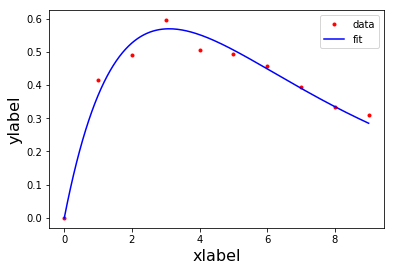

In [8]:
#solve the system - the solution is in variable c
guess = [0.2,0.3] #initial guess for params
y0 = [1,0,0] #inital conditions for ODEs
(c,kvg) = optimize.leastsq(f_resid, guess) #get params

print ("parameter values are ",c)

# fit ODE results to interpolating spline just for fun
xeval=np.linspace(min(x_data), max(x_data),30) 
gls = interpolate.UnivariateSpline(xeval, my_ls_func(xeval,c), k=3, s=0)

#pick a few more points for a very smooth curve, then plot 
#   data and curve fit
xeval=np.linspace(min(x_data), max(x_data),200)
#Plot of the data as red dots and fit as blue line
pp.plot(x_data, y_data,'.r',xeval,gls(xeval),'-b')
pp.xlabel('xlabel',{"fontsize":16})
pp.ylabel("ylabel",{"fontsize":16})
pp.legend(('data','fit'),loc=0)
pp.show()